In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

data : adult.csv  
* target : income  
preprocess:  
* missing value : simple imputer with constant  
* one hot encoding : relationship, race, sex  
* binary encoding : workclass, marital status, occupation, native country    
* ordinal encoding : education (already encoded)  
* no treatment : numerical  
out : fnlwgt  
Random state 10, data splitting 70:30 model Tree(max depth 5,  criterion entropy)


In [3]:
df = pd.read_csv('adult.csv')
df.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Missing Value
missing value marked with ?

In [4]:
df.replace('?',np.nan).isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
df = df.replace('?',np.nan)

In [6]:
df = df.drop(columns='education')

## Preprocessing


In [7]:
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [8]:
imputer_cons = SimpleImputer(strategy='constant',fill_value='P')
binary=ce.BinaryEncoder()

pipe_binary= Pipeline([
('impute',imputer_cons),
('Binary',binary)])

transformer = ColumnTransformer([
('One Hot',OneHotEncoder(),['relationship','race','sex']),
('Binary',pipe_binary,['workclass', 'marital.status', 'occupation', 'native.country']),
], remainder='passthrough')


In [9]:
x = transformer.fit_transform(df.drop(columns='income'))

In [10]:
features = list(transformer.transformers_[0][1].get_feature_names())+transformer.transformers_[1][1][1].get_feature_names()+['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

In [11]:
x = pd.DataFrame(x,columns=features)

In [12]:
y = np.where(df['income']=='<=50K',0,1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2020,test_size=0.3)

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train,y_train)

y_predict_test=tree.predict(x_test)
acc_score = accuracy_score(y_test,y_predict_test)

In [15]:
print('Akurasi:',acc_score)

Akurasi: 0.8462483365748797


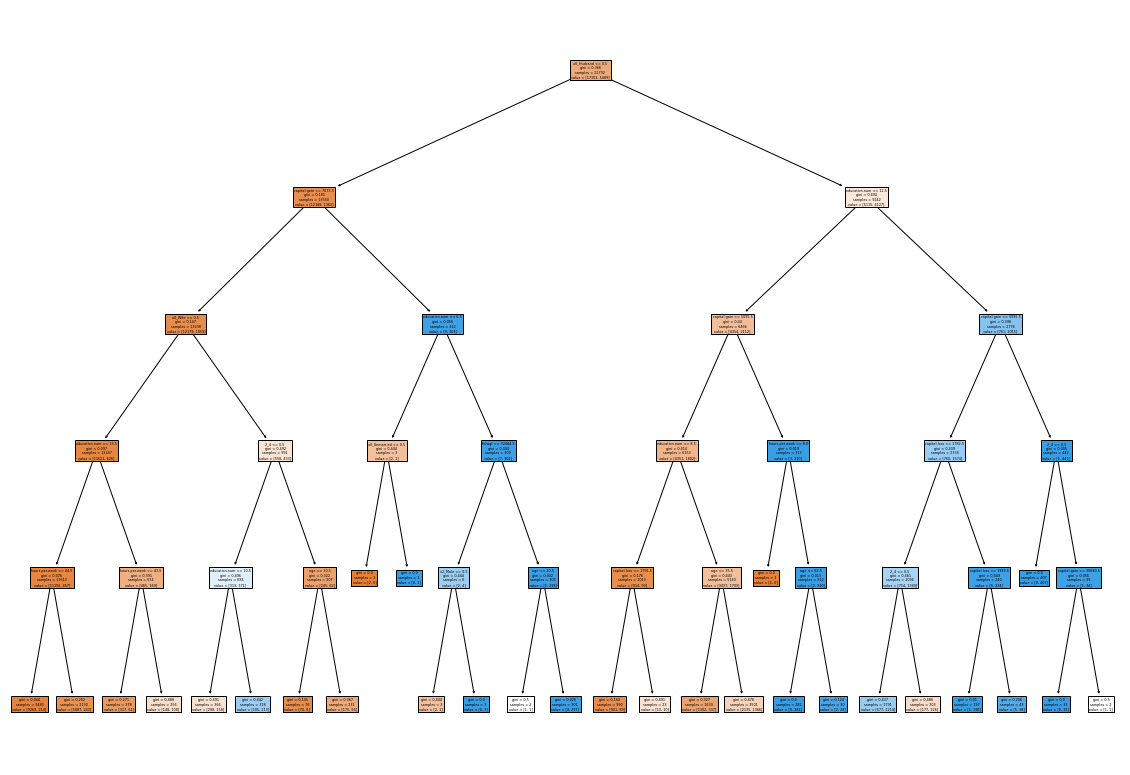

In [16]:
plt.figure(figsize=(20,14))
plot_tree(tree,feature_names=features,filled=True)
plt.show()